In [411]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import copy
import missingno as msno
%matplotlib inline 
# 기본 경로 설정
os.chdir('C:/Users/gksru/Desktop/study/Lpoint/제6회 L.POINT Big Data Competition')
# 폰트 설정
mpl.rc('font', family=' Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

warnings.filterwarnings('ignore')

### 1. 온라인 행동 정보<br>
* 데이터 설명서

|번호|변수명(영문)|변수명(국문)|상세 설명|PK|
|-|---|---|----|-|
|1|CLNT_ID|클라이언트 ID|고객을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|v|
|2|SESS_ID|세션 ID| Web/App 에 접속 후 세션이 시작될 때 부여된 순번 ID<br>※하나의 클라이언트 ID 에 여러 개의 세션 ID 가 발급될 수 있음|v|
|3|HIT_SEQ|조회일련번호|조회 순서를 알 수 있도록 부여된 일련번호|v|
|4|ACTION_TYPE|조회일련번호|총 8 가지의 행동 유형을 구분한 코드<br>[0.검색 / 1.제품 목록 / 2.제품 세부정보 보기<br> / 3.장바구니 제품 추가/4.장바구니 제품 삭제 / 5.결제 시도 <br>/ 6.구매 완료 / 7.구매 환불 / 8.결제 옵션 ]||
|5|BIZ_UNIT|업종단위|온라인 및 오프라인 이용처를 구분하는 단위코드||
|6|SESS_DT|세션일자|세션일자 (YYYYMMDD 형식으로 표시)||
|7|HIT_TM|조회시각|조회시각 (HH:MM 형식으로 표시)||
|8|HIT_PSS_TM|조회일련번호|세션이 시작된 이후 해당 조회까지 경과한 시간<br>(단위 : 밀리초)<br>※ 첫 번째 조회이면 0 으로 설정됩니다.||
|9|TRANS_ID|거래 ID|구매 내역을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID||
|10|SRCH_KWD|검색 키워드|고객이 검색한 키워드||
|11|TOT_PAG_VIEW_CT|총페이지조회건수|세션 내의 총 페이지(화면)뷰 수||
|12|TOT_SESS_HR_V|총세션시간값|세션 내 총 시간(단위: 초)||
|13|TRFC_SRC|유입채널|고객이 유입된 채널<br>[DIRECT / PUSH / WEBSITE / PORTAL_1 / PORTAL_2 / PORTAL_3 / unknown]||
|14|DVC_CTG_NM|기기유형|기기 유형 [mobile_web / mobile_app / PC]||


In [412]:
online_data = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv')
online_data.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN


### 2. 거래 정보<br>
* 데이터 설명서

|번호|변수명(영문)|변수명(국문)|상세 설명|PK|
|-|---|---|----|-|
|1|CLNT_ID|클라이언트 ID|고객을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|v|
|2|TRANS_ID|거래 ID|구매 내역을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID |v|
|3|TRANS_SEQ|거래일련번호|해당 거래 ID 의 구매 내역 내 구매 순서를 알 수 있도록<br> 부여된 일련번호|v|
|4|BIZ_UNIT|업종단위|온라인 및 오프라인 이용처를 구분하는 단위코드||
|5|PD_C|상품소분류코드|상품의 소분류코드||
|6|DE_DT|구매일자|상품을 구매한 일자 (YYYYMMDD 형식)||
|7|DE_TM|구매시각|상품을 구매한 시각 (HHMM 형식)||
|8|BUY_AM|구매금액|구매한 상품의 금액||
|9|BUY_CT|구매수량|구매한 상품의 수량||


In [413]:
trade_data = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-02.거래 정보.csv')
trade_data.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1


In [414]:
trade_data['pd_c'].value_counts()

unknown    17652
1213       15518
0347       12914
0964       11115
1395       11083
           ...  
1541           1
0144           1
0512           1
0759           1
1639           1
Name: pd_c, Length: 1668, dtype: int64

### 3. 고객 Demographic 정보<br>
* 데이터 설명서

|번호|변수명(영문)|변수명(국문)|상세 설명|PK|
|-|---|---|----|-|
|1|CLNT_ID|클라이언트 ID|고객을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|v|
|2|CLNT_GENDER|성별|성별정보<br> [남자 : M / 여자 : F / 정보없음 : unknown]||
|3|CLNT_AGE|연령대|연령대 정보<br>[10 대이하 / 20 대 / 30 대 / 40 대 / 50 대 / 60 대이상<br> / 정보없음 : unknown]||

In [415]:
demo_data = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-03.고객 Demographic 정보.csv')
demo_data.head()

,clnt_id,clnt_gender,clnt_age
0,1,unknown,unknown
1,2,F,30
2,3,unknown,unknown
3,4,unknown,unknown
4,5,unknown,unknown


In [416]:
online_data.drop_duplicates('clnt_id',keep = 'first')

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
13,30605,11,2,2,A03,20190820,23:24,54174,NaN,NaN,3.0,54.0,DIRECT,NaN
97,28304,1,3,3,A03,20190716,11:29,501434,NaN,NaN,56.0,1303.0,PUSH,mobile_web
113,43159,1,1,3,A03,20190830,21:35,42229,NaN,NaN,18.0,1248.0,DIRECT,PC
115,20011,1,6,4,A03,20190717,10:23,275765,NaN,NaN,18.0,350.0,DIRECT,PC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195850,59569,1,1,0,A02,20190821,15:36,13404,NaN,쿠쿠 hpf,4.0,32.0,unknown,mobile_web
3195851,34947,1,1,0,A02,20190826,09:41,8921,NaN,노니구미,3.0,9.0,unknown,PC
3196105,4738,1,1,0,A02,20190712,01:06,0,NaN,디스커버리여성반팔티,1.0,NaN,unknown,mobile_web
3196136,19454,1,1,0,A02,20190729,10:05,36846,NaN,볼링티,2.0,37.0,unknown,mobile_app


### 4. 상품 분류 정보<br>
* 데이터 설명서

|번호|변수명(영문)|변수명(국문)|상세 설명|PK|
|-|---|---|----|-|
|1|PD_C|상품 소분류코드|상품의 소분류코드(최소단위)|v|
|2|CLAC1_NM|상품 대분류명|상품 대분류명||
|3|CLAC2_NM|상품 중분류명|상품 중분류명||
|4|CLAC3_NM|상품 소분류명|상품 소분류명||

In [417]:
class_data = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-04.상품분류 정보.csv')
class_data.head()

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades


In [418]:
class_data

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades
...,...,...,...,...
1662,1663,Women's Clothing,Women's Upper Bodywear / Tops,Women's Cardigans
1663,1664,Women's Clothing,Women's Upper Bodywear / Tops,Women's Sweaters / Pullover
1664,1665,Women's Clothing,Women's Upper Bodywear / Tops,Women's Sweatshirts / Hoodies
1665,1666,Women's Clothing,Women's Upper Bodywear / Tops,Women's T-shirts / Tops


# EDA

# 온라인 행동 정보

In [420]:
online_data.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN


In [421]:
online_data.dtypes

clnt_id              int64
sess_id              int64
hit_seq              int64
action_type          int64
biz_unit            object
sess_dt              int64
hit_tm              object
hit_pss_tm           int64
trans_id           float64
sech_kwd            object
tot_pag_view_ct    float64
tot_sess_hr_v      float64
trfc_src            object
dvc_ctg_nm          object
dtype: object

<AxesSubplot:>

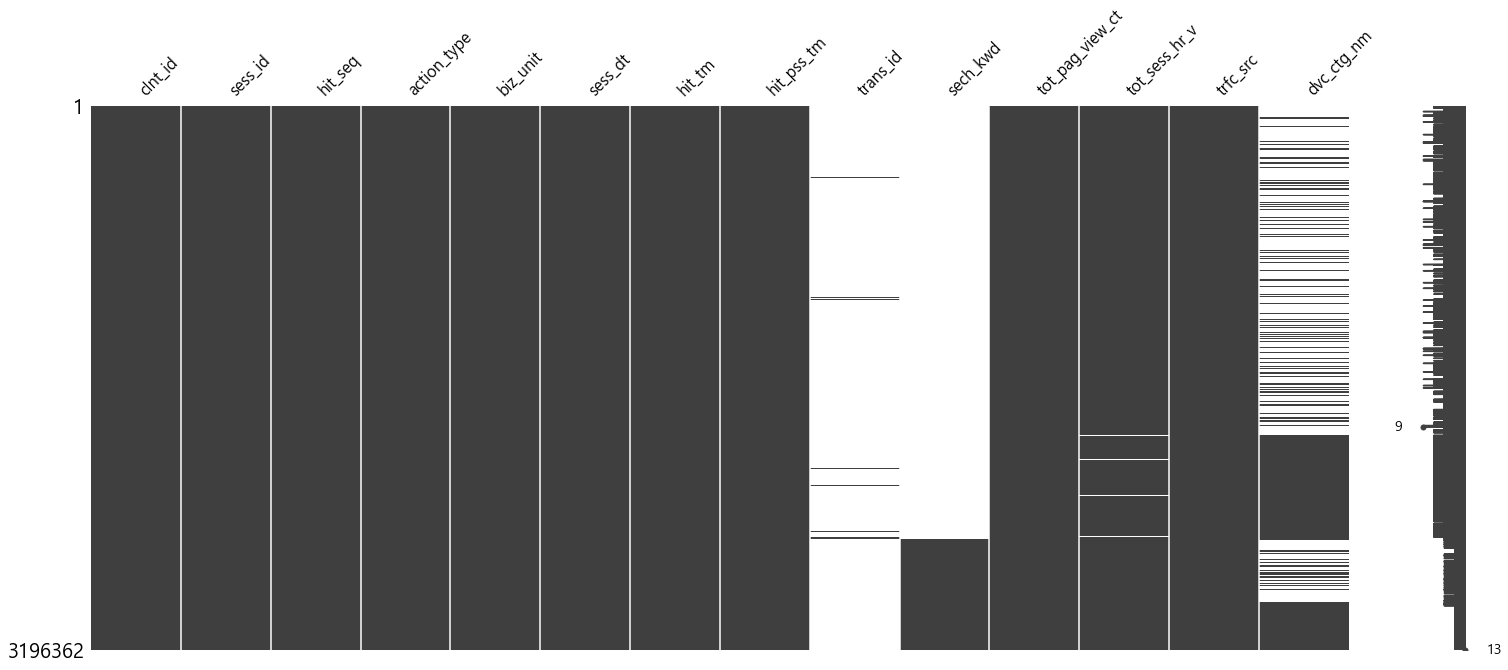

In [422]:
msno.matrix(online_data)

* 결측치가 왜이리 많은 건지??

In [423]:
online_data.isna().sum()

clnt_id                  0
sess_id                  0
hit_seq                  0
action_type              0
biz_unit                 0
sess_dt                  0
hit_tm                   0
hit_pss_tm               0
trans_id           3139373
sech_kwd           2544724
tot_pag_view_ct       1428
tot_sess_hr_v        57607
trfc_src                 0
dvc_ctg_nm         1782577
dtype: int64

In [428]:
online_data['sess_dt'] = online_data['sess_dt'].astype('str')
online_data['sess_dt'] = online_data['sess_dt'] + online_data['hit_tm']
online_data['sess_dt'] = online_data['sess_dt'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d%H:%M'))

In [430]:
online_data['month'] = online_data['sess_dt'].apply(lambda x: x.month)

In [431]:
online_data['hour'] = online_data['sess_dt'].apply(lambda x: x.hour)

In [432]:
online_data['count'] = 1

In [433]:
online_action_count = online_data.groupby('action_type').count()['count']
online_action_count

action_type
0    651638
1    307998
2    655266
3    596765
4    172240
5    750530
6     56249
7      5676
Name: count, dtype: int64

0.검색 / 1.제품 목록 / 2.제품 세부정보 보기 / 3.장바구니 제품 추가 / 4.장바구니 제품 삭제 / 5.결제 시도 / 6.구매 완료 / 7.구매 환불 / 8.결제 옵션

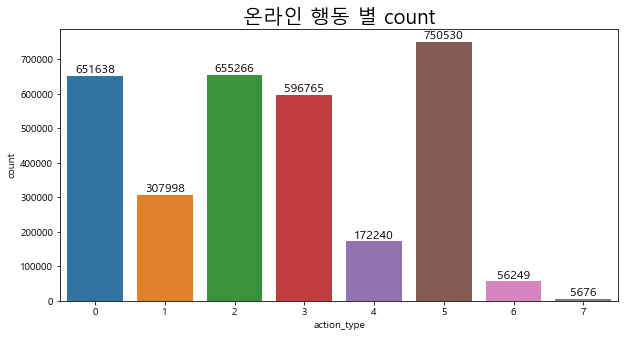

In [303]:
plt.figure(figsize=(10,5))
sns.barplot(data = online_action_count.reset_index() , x = 'action_type', y = 'count')
y = list(online_action_count)
for i, v in enumerate(list(online_action_count.index)):
    plt.text(v, y[i], y[i],                 
             fontsize = 12, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.title('온라인 행동 별 count',fontsize = 20)
plt.show()

* 결제 시도 횟수가 가장 많지만, 구매 완료에 대한 행동 정보는 유난히 적다.
* 구매를 하고 구매 완료 버튼을 눌러야 구매 완료가 되는 것인지??

In [100]:
online_action_count.reset_index()

,action_type,count
0,0,651638
1,1,307998
2,2,655266
3,3,596765
4,4,172240
5,5,750530
6,6,56249
7,7,5676


In [86]:
online_month_action = online_data.groupby(['month','action_type']).count()['count'].reset_index()

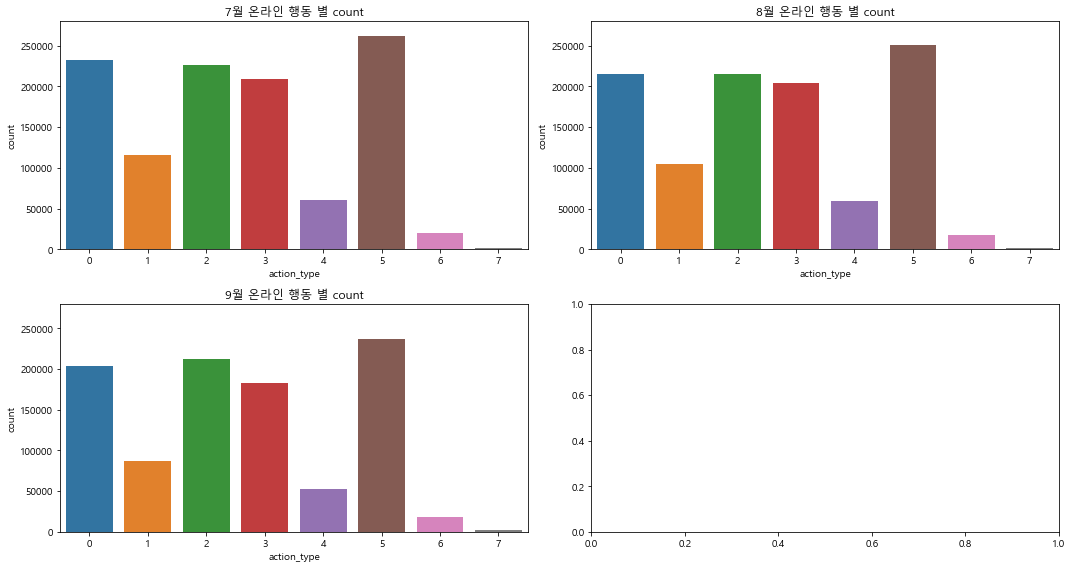

In [109]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,8)

for i in [7,8,9]:
    if i%2==0:
        t=1
    else:
        t=0
    sns.barplot(data = online_month_action[online_month_action['month'] == i], x= 'action_type', y = 'count',ax = axes[(i-7)//2][t])
    axes[(i-7)//2][t].set_title('{}월 온라인 행동 별 count'.format(i,size=20))
    axes[(i-7)//2][t].set_ylim(0,280000)
plt.tight_layout()
plt.show()

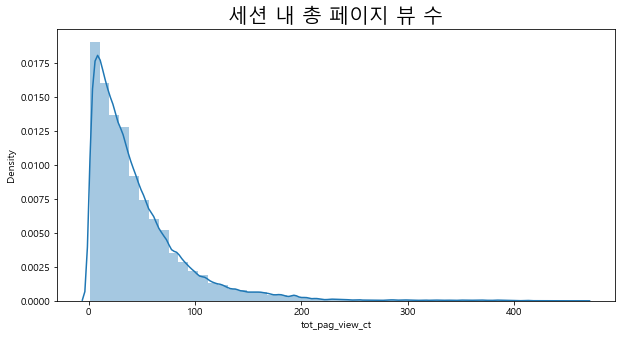

In [82]:
plt.figure(figsize=(10,5))
sns.distplot(online_data['tot_pag_view_ct'])
plt.title('세션 내 총 페이지 뷰 수', fontsize = 20)
plt.show()

In [115]:
online_hour_action = online_data.groupby(['action_type','hour']).count()['count'].reset_index()

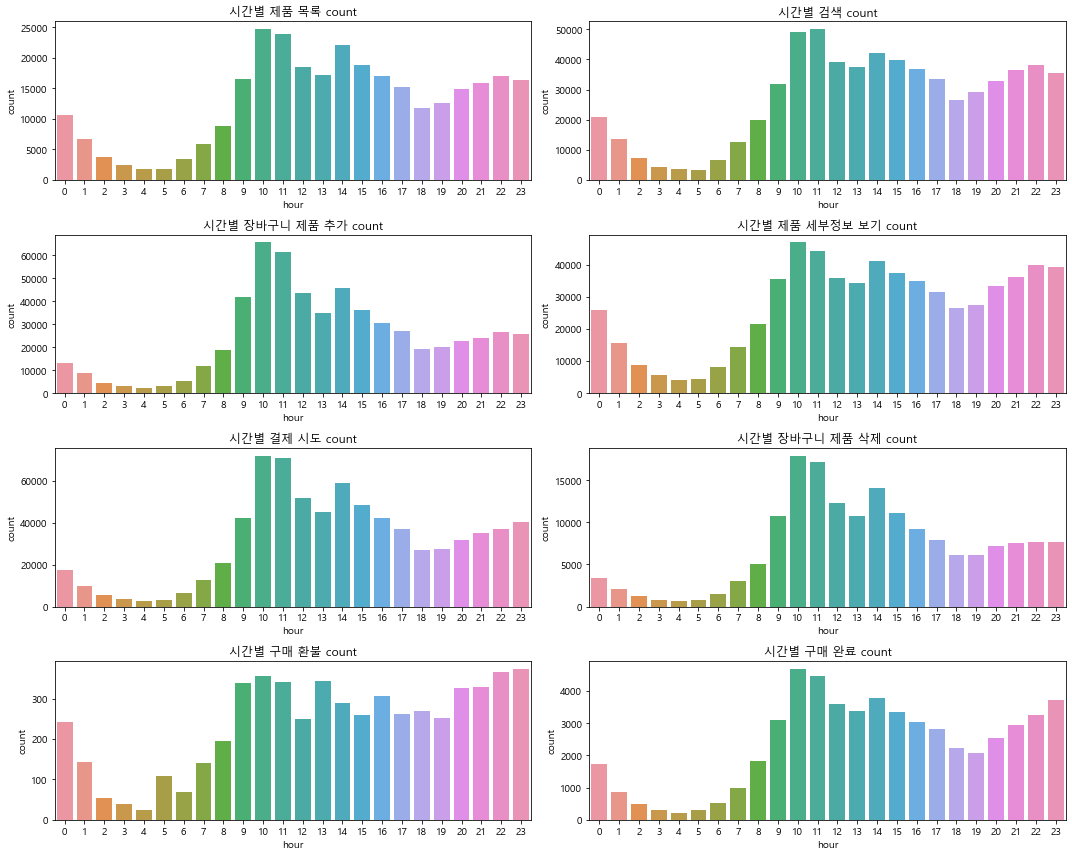

In [123]:
fig,axes=plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,12)
action = {0: '검색', 1: '제품 목록', 2: '제품 세부정보 보기', 3: '장바구니 제품 추가', 4: '장바구니 제품 삭제', 5: '결제 시도', 6: '구매 완료', 7: '구매 환불', 8: '결제 옵션'}
for i in range(8):
    if i%2==0:
        t=1
    else:
        t=0
    sns.barplot(data = online_hour_action[online_hour_action['action_type'] == i], x= 'hour', y = 'count',ax = axes[i//2][t])
    axes[i//2][t].set_title('시간별 {} count'.format(action[i],size=20))
plt.tight_layout()
plt.show()

* 주로 10 ~ 11시 사이에 온라인 행동이 활발하다.
* 22시~ 23시 밤 시간에 구매 환불이 빈번하게 일어난다.
* 주로 오후 저녁 시간대 보다 밤 시간대에 이용이 활발하다.

In [138]:
online_sess_action = online_data.groupby(['clnt_id', 'sess_id', 'action_type']).count()['count'].reset_index()

In [142]:
online_sess_action_clnt = online_sess_action.merge(demo_data, on = 'clnt_id')

In [155]:
online_sess_buy = online_sess_action_clnt[online_sess_action_clnt['action_type'] == 5].groupby(['clnt_age','clnt_gender']).mean()['count'].reset_index()

In [162]:
online_sess_buy_age = online_sess_action_clnt[online_sess_action_clnt['action_type'] == 5].groupby(['clnt_age']).mean()['count'].reset_index()

In [166]:
online_sess_buy_age

,clnt_age,count
0,10,5.480000
1,20,6.815552
2,30,7.851689
3,40,7.432806
4,50,6.732258
5,60,6.697817
6,unknown,5.023539


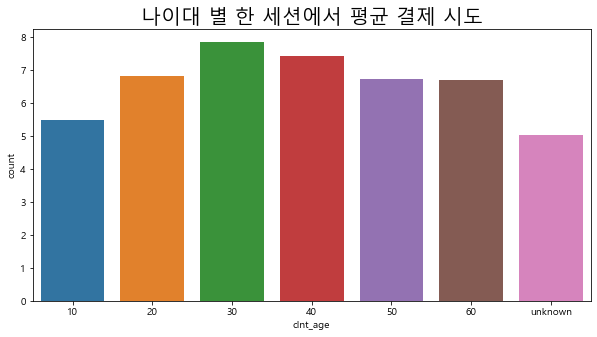

In [168]:
plt.figure(figsize=(10,5))
sns.barplot(data = online_sess_buy_age, x = 'clnt_age', y = 'count')
plt.title('나이대 별 한 세션에서 평균 결제 시도',fontsize = 20)
plt.show()

* 결제 시도가 구매 완료에 비해 너무 많아 나이가 많을 수록 평균 결제시도가 많은지 확인
* 딱히 그런 것도 아님

In [256]:
online_sech_kwd = online_data['sech_kwd'].value_counts().reset_index()

In [277]:
online_sech_kwd.columns = ['sech_kwd', 'count']

In [282]:
online_sech_kwd.iloc[:10,:]['count']

0    8985
1    5210
2    5039
3    4283
4    2694
5    2583
6    2493
7    2481
8    2046
9    2007
Name: count, dtype: int64

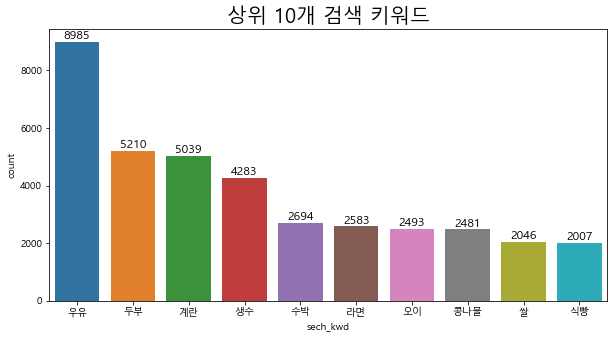

In [305]:
plt.figure(figsize=(10,5))
sns.barplot(data = online_sech_kwd.iloc[:10,:], x = 'sech_kwd', y = 'count')
y = list(online_sech_kwd.iloc[:10,:]['count'])
for i, v in enumerate([i for i in range(10)]):
    plt.text(v, y[i], y[i],                 
             fontsize = 12, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.title('상위 10개 검색 키워드',fontsize = 20)
plt.show()

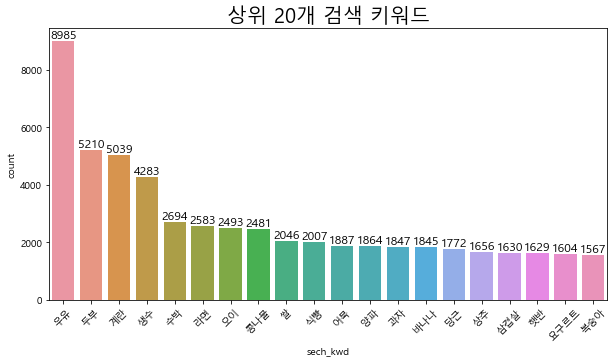

In [309]:
plt.figure(figsize=(10,5))
sns.barplot(data = online_sech_kwd.iloc[:20,:], x = 'sech_kwd', y = 'count')
y = list(online_sech_kwd.iloc[:20,:]['count'])
for i, v in enumerate([i for i in range(20)]):
    plt.text(v, y[i], y[i],                 
             fontsize = 12, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.xticks(rotation = 45)
plt.title('상위 20개 검색 키워드',fontsize = 20)
plt.show()

* 주로 검색을 하였을 때 식품 관련 검색이 많았다.
* 식품이 아닐 때에는 상표 이름을 검색해서 그런가 싶다.

In [316]:
online_demo = online_data[['clnt_id','sess_id','action_type','sech_kwd']].merge(demo_data, on = 'clnt_id')

In [322]:
age_gender_list = list(online_demo.groupby(['clnt_age','clnt_gender']).count().index)

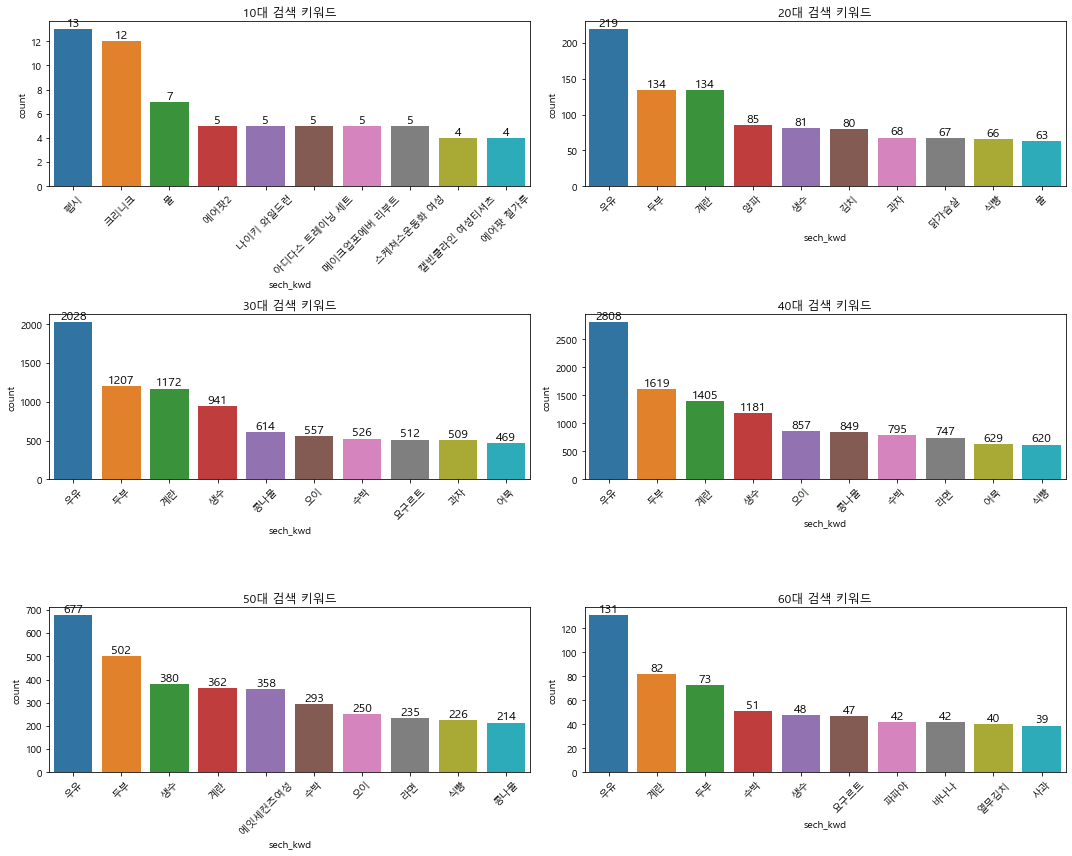

In [350]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,12)
age = ['10', '20', '30', '40', '50', '60']
for i in range(6):
    if i%2==0:
        t=0
    else:
        t=1
    df = online_demo[(online_demo['clnt_age'] == age[i])]
    df = df['sech_kwd'].value_counts().reset_index()
    df.columns = ['sech_kwd', 'count']
    sns.barplot(data = df.iloc[:10,:], x= 'sech_kwd', y = 'count',ax = axes[i//2][t])
    y = list(df.iloc[:10,:]['count'])
    for j, v in enumerate([k for k in range(10)]):
        axes[i//2][t].text(v, y[j], y[j],                 
                 fontsize = 12, 
                 color='black',
                 horizontalalignment='center',
                 verticalalignment='bottom'
                )
    
    axes[i//2][t].set_title('{}대 검색 키워드'.format(age[i],size=30))
    axes[i//2][t].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [351]:
online_demo

,clnt_id,sess_id,action_type,sech_kwd,clnt_gender,clnt_age
0,7809,1,5,NaN,unknown,unknown
1,7809,1,2,NaN,unknown,unknown
2,7809,1,5,NaN,unknown,unknown
3,7809,1,2,NaN,unknown,unknown
4,7809,1,5,NaN,unknown,unknown
...,...,...,...,...,...,...
3196357,34947,1,0,노니구미,unknown,unknown
3196358,4738,1,0,디스커버리여성반팔티,unknown,unknown
3196359,19454,1,0,볼링티,unknown,unknown
3196360,4129,1,0,여성메탈시계,unknown,unknown


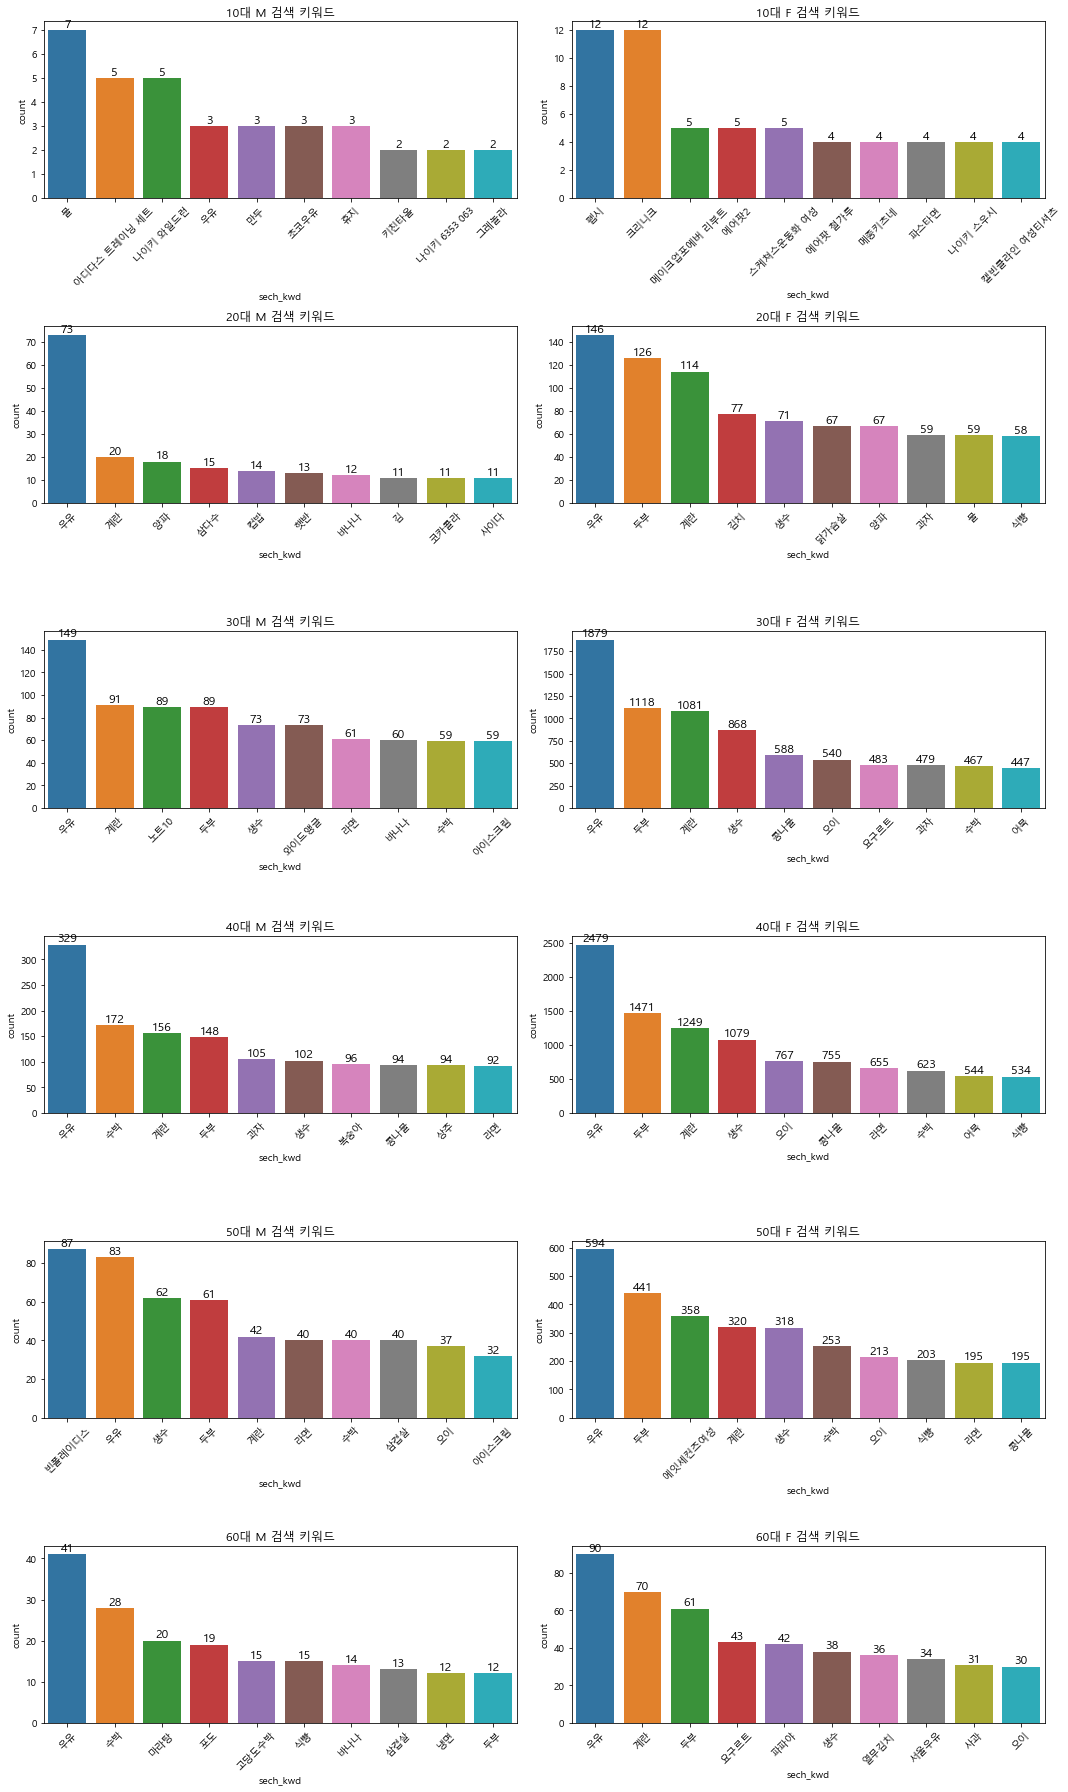

In [356]:
fig,axes=plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(15,25)
age = ['10', '10', '20', '20', '30', '30', '40', '40', '50', '50', '60', '60']
gender = ['M', 'F']
for i in range(12):
    if i%2==0:
        t=0
    else:
        t=1
    df = online_demo[(online_demo['clnt_age'] == age[i]) & (online_demo['clnt_gender'] == gender[t])]
    df = df['sech_kwd'].value_counts().reset_index()
    df.columns = ['sech_kwd', 'count']
    sns.barplot(data = df.iloc[:10,:], x= 'sech_kwd', y = 'count',ax = axes[i//2][t])
    y = list(df.iloc[:10,:]['count'])
    for j, v in enumerate([k for k in range(10)]):
        axes[i//2][t].text(v, y[j], y[j],                 
                 fontsize = 12, 
                 color='black',
                 horizontalalignment='center',
                 verticalalignment='bottom'
                )
    
    axes[i//2][t].set_title('{}대 {} 검색 키워드'.format(age[i], gender[t], size=30))
    axes[i//2][t].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

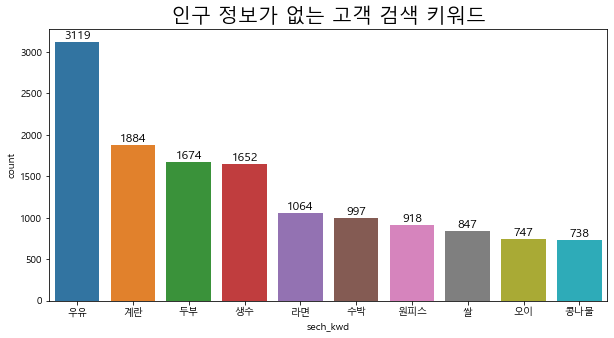

In [366]:
plt.figure(figsize=(10,5))
df = online_demo[(online_demo['clnt_age'] == 'unknown') & (online_demo['clnt_gender'] == 'unknown')]
df = df['sech_kwd'].value_counts().reset_index()
df.columns = ['sech_kwd', 'count']
sns.barplot(data = df.iloc[:10,:], x= 'sech_kwd', y = 'count')
y = list(df.iloc[:10,:]['count'])
for j, v in enumerate([k for k in range(10)]):
    plt.text(v, y[j], y[j],                 
             fontsize = 12, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom'
            )

plt.title('인구 정보가 없는 고객 검색 키워드',fontsize = 20)
plt.show()

* 50대 남성을 제외하고 우유에 대한 검색 키워드가 가장 많음
* 왜 많은거지?


## 이따 결제시도를 하고 어떠한 행동을 가장 많이 했는지

검색을 하고 샀는지도

In [434]:
online_sess_hit = online_data[['clnt_id', 'sess_id', 'hit_seq', 'action_type', 'sess_dt']]

In [435]:
online_sess_hit_sort = online_sess_hit.sort_values(by = ['clnt_id', 'sess_id','hit_seq']).reset_index(drop = True)

In [436]:
sess_zip = list(zip(online_sess_hit_sort['clnt_id'], online_sess_hit_sort['sess_id'],
                    online_sess_hit_sort['hit_seq'], online_sess_hit_sort['action_type'],
                    online_sess_hit_sort['sess_dt']))

In [437]:
sess_zip

[(1, 1, 1, 0, Timestamp('2019-09-11 16:14:00')),
 (1, 1, 2, 0, Timestamp('2019-09-11 16:15:00')),
 (1, 1, 3, 0, Timestamp('2019-09-11 16:15:00')),
 (1, 2, 1, 0, Timestamp('2019-09-22 14:09:00')),
 (1, 2, 2, 0, Timestamp('2019-09-22 14:10:00')),
 (1, 2, 3, 0, Timestamp('2019-09-22 14:10:00')),
 (1, 2, 4, 0, Timestamp('2019-09-22 14:11:00')),
 (1, 2, 5, 0, Timestamp('2019-09-22 14:11:00')),
 (1, 2, 6, 0, Timestamp('2019-09-22 14:12:00')),
 (1, 2, 7, 0, Timestamp('2019-09-22 14:12:00')),
 (2, 1, 1, 0, Timestamp('2019-07-28 23:35:00')),
 (2, 1, 2, 1, Timestamp('2019-07-28 23:35:00')),
 (2, 1, 3, 2, Timestamp('2019-07-28 23:35:00')),
 (2, 1, 4, 0, Timestamp('2019-07-28 23:35:00')),
 (2, 1, 5, 0, Timestamp('2019-07-28 23:36:00')),
 (2, 1, 6, 3, Timestamp('2019-07-28 23:36:00')),
 (2, 1, 7, 5, Timestamp('2019-07-28 23:36:00')),
 (2, 1, 8, 5, Timestamp('2019-07-28 23:37:00')),
 (2, 1, 9, 0, Timestamp('2019-07-28 23:37:00')),
 (2, 1, 10, 1, Timestamp('2019-07-28 23:37:00')),
 (2, 1, 11, 2, Time

In [444]:
online_data[online_data['action_type'] == 0]

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,month,hour,count
2544724,30605,16,1,0,A03,2019-09-07 22:04:00,22:04,14548,NaN,버터,3.0,39.0,DIRECT,NaN,9,22,1
2544725,30605,12,2,0,A03,2019-08-21 23:36:00,23:36,422952,NaN,카누,5.0,467.0,DIRECT,NaN,8,23,1
2544726,30605,13,1,0,A03,2019-08-22 14:47:00,14:47,0,NaN,카누,1.0,NaN,DIRECT,NaN,8,14,1
2544727,28304,1,13,0,A03,2019-07-16 11:36:00,11:36,933562,NaN,비비고만두,56.0,1303.0,PUSH,mobile_web,7,11,1
2544728,28304,1,11,0,A03,2019-07-16 11:35:00,11:35,820901,NaN,어묵,56.0,1303.0,PUSH,mobile_web,7,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196357,31040,1,1,0,A02,2019-08-15 03:47:00,03:47,13525,NaN,다이슨 에어랩,4.0,62.0,unknown,mobile_web,8,3,1
3196358,4129,1,2,0,A02,2019-07-21 01:22:00,01:22,250099,NaN,여성메탈시계,3.0,250.0,unknown,mobile_web,7,1,1
3196359,4129,1,1,0,A02,2019-07-21 01:18:00,01:18,1525,NaN,여성메탈시계,3.0,250.0,unknown,mobile_web,7,1,1
3196360,54403,3,1,0,A02,2019-07-31 20:14:00,20:14,16905,NaN,비비고왕교자,3.0,68.0,unknown,mobile_app,7,20,1


In [442]:
time_to_buy = []
clnt = 0
sess = 0
t = False
first = False
for i in sess_zip:
    if clnt != i[0]:
        clnt = i[0]
        sess = i[1]
        continue
    elif sess != i[1]:
        

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

# 거래 정보

가장 많이 팔린 상품

검색을 하고 샀는지

In [446]:
trade_data

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1
...,...,...,...,...,...,...,...,...,...
599956,35311,2839,3,B03,0339,20190927,14:09,3500,1
599957,35311,2839,4,B03,0339,20190927,14:09,3600,2
599958,35311,2839,5,B03,0339,20190927,14:09,3500,1
599959,35311,2839,2,B03,0339,20190927,14:09,4500,1


In [190]:
online_data[(online_data['clnt_id'] == 20) & (online_data['action_type'].apply(lambda x: x in [5, 6,7]))]

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,month,count,hour
2539826,20,1,1,6,A01,2019-07-31,20:40,624578,64923.0,NaN,13.0,624.0,DIRECT,PC,7,1,20


In [179]:
trade_data[trade_data['clnt_id'] == 64325]

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct


In [176]:
trade_data.sort_values(by = 'de_dt')

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
124308,19819,38942,14,A03,0194,20190701,10:27,5790,1
482053,28655,119696,4,B01,1587,20190701,12:55,990,1
482052,28655,119696,2,B01,0221,20190701,12:55,490,1
482051,46269,140604,1,B01,0548,20190701,18:28,13900,1
482050,40719,134288,4,B01,0107,20190701,17:21,1380,1
...,...,...,...,...,...,...,...,...,...
240852,36122,118259,8,B01,0649,20190930,19:29,3000,1
240853,7410,139880,1,B01,0033,20190930,17:00,3900,1
240854,7410,139880,4,B01,1185,20190930,17:00,1100,1
240844,22016,142942,4,B01,1596,20190930,15:30,990,1


In [192]:
trade_data_drop = trade_data.drop_duplicates('trans_id')

In [203]:
aa = trade_data_drop[trade_data_drop['biz_unit'].apply(lambda x: x[0] == 'A')].sort_values('clnt_id')

In [223]:
aaa = list(zip(aa['clnt_id'],aa['trans_id']))

In [224]:
bbb = list(zip(bb['clnt_id'],bb['trans_id']))

In [208]:
bb = online_data[online_data['action_type']==6].sort_values(by = 'clnt_id')

In [220]:
q =[]
for i in bbb:
    if i not in aaa:
        q.append(i)

In [221]:
len(q)

34191

In [222]:
len(bbb)

56249

온라인 행동 정보에서 구매 내역과 거래 내역 데이터가 너무 다름 <br>
합집합으로 써야하나?